In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

# Set paths
train_dir = '/home/data/train'
test_dir = '/home/data/test'

print("Loading training data...")
train_files = os.listdir(train_dir)
print(f"Total training images: {len(train_files)}")

# Separate cats and dogs
cat_files = [f for f in train_files if f.startswith('cat')]
dog_files = [f for f in train_files if f.startswith('dog')]

print(f"Cat images: {len(cat_files)}")
print(f"Dog images: {len(dog_files)}")

# Check test data
test_files = os.listdir(test_dir)
print(f"Test images: {len(test_files)}")

Loading training data...
Total training images: 22500
Cat images: 11242
Dog images: 11258
Test images: 2500


In [2]:
# Analyze image sizes and characteristics
print("Analyzing image characteristics...")

# Sample some images to analyze sizes
sample_files = train_files[:1000]  # Sample first 1000 images

widths = []
heights = []
aspect_ratios = []
file_sizes = []

for file in sample_files:
    try:
        img_path = os.path.join(train_dir, file)
        with Image.open(img_path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
            aspect_ratios.append(width / height)
            file_sizes.append(os.path.getsize(img_path))
    except Exception as e:
        print(f"Error with {file}: {e}")

print(f"Analyzed {len(widths)} images")
print(f"\nWidth stats:")
print(f"  Min: {min(widths)}")
print(f"  Max: {max(widths)}")
print(f"  Mean: {np.mean(widths):.1f}")
print(f"  Median: {np.median(widths):.1f}")

print(f"\nHeight stats:")
print(f"  Min: {min(heights)}")
print(f"  Max: {max(heights)}")
print(f"  Mean: {np.mean(heights):.1f}")
print(f"  Median: {np.median(heights):.1f}")

print(f"\nAspect ratio stats:")
print(f"  Min: {min(aspect_ratios):.2f}")
print(f"  Max: {max(aspect_ratios):.2f}")
print(f"  Mean: {np.mean(aspect_ratios):.2f}")

print(f"\nFile size stats (KB):")
print(f"  Min: {min(file_sizes)/1024:.1f}")
print(f"  Max: {max(file_sizes)/1024:.1f}")
print(f"  Mean: {np.mean(file_sizes)/1024:.1f}")

Analyzing image characteristics...
Analyzed 1000 images

Width stats:
  Min: 50
  Max: 500
  Mean: 407.8
  Median: 458.5

Height stats:
  Min: 38
  Max: 500
  Mean: 359.0
  Median: 374.0

Aspect ratio stats:
  Min: 0.38
  Max: 2.99
  Mean: 1.17

File size stats (KB):
  Min: 1.4
  Max: 74.3
  Mean: 22.0


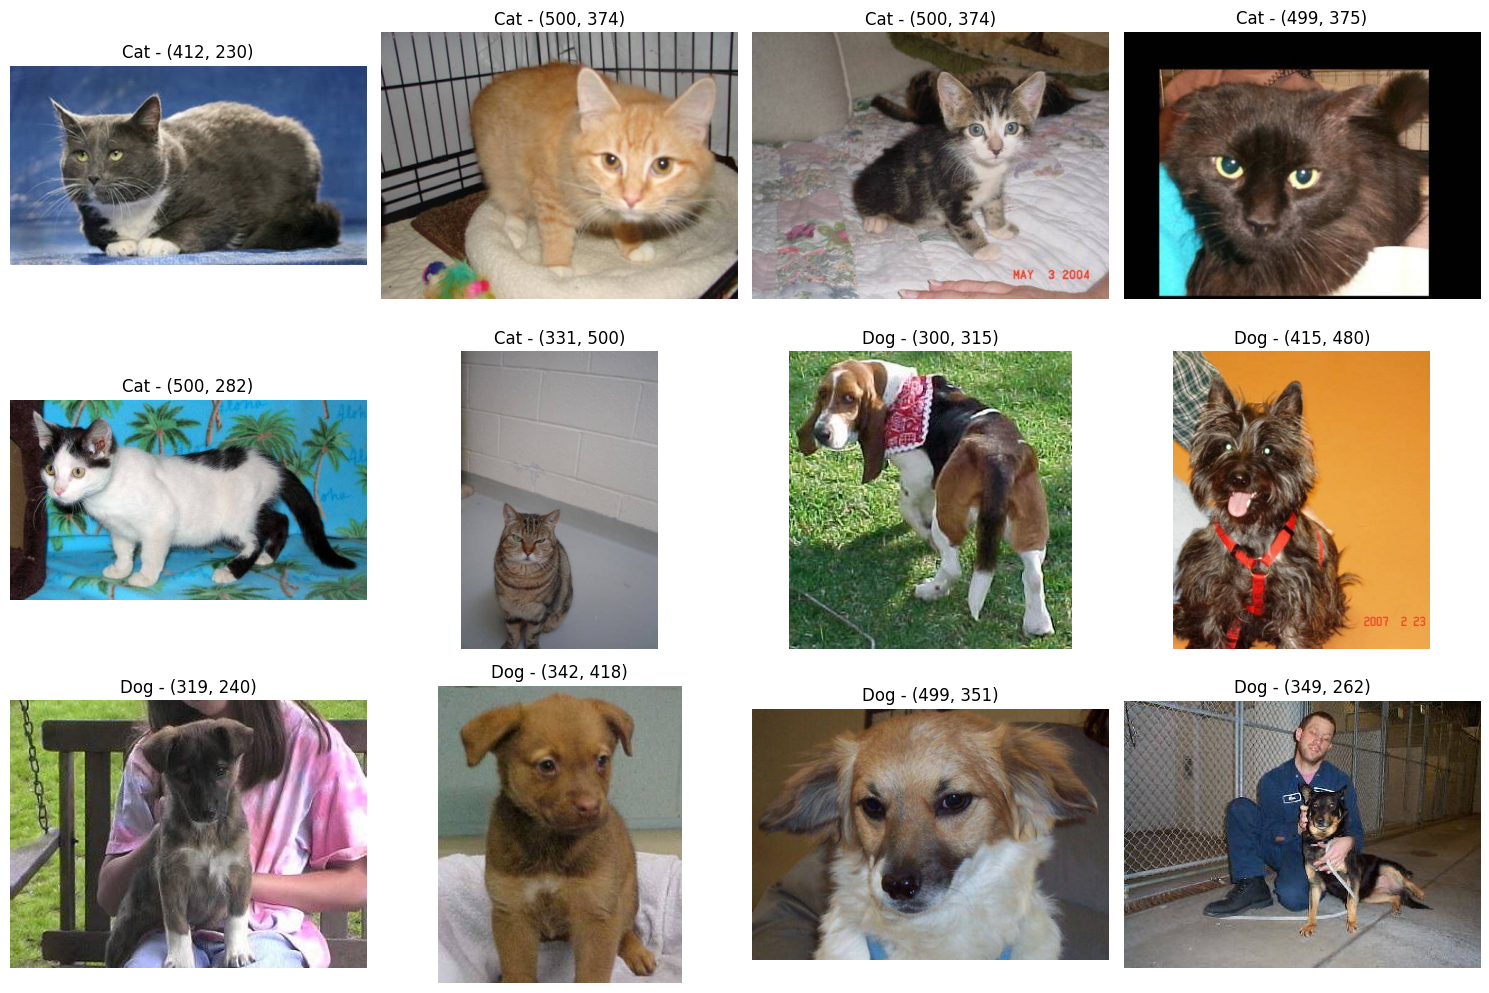

Sample cat images: ['cat.8112.jpg', 'cat.1197.jpg', 'cat.116.jpg']
Sample dog images: ['dog.5.jpg', 'dog.8491.jpg', 'dog.9129.jpg']


In [3]:
# Visualize sample images
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.ravel()

# Show some cat images
cat_samples = cat_files[:6]
for i, cat_file in enumerate(cat_samples):
    img_path = os.path.join(train_dir, cat_file)
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].set_title(f'Cat - {img.size}')
    axes[i].axis('off')

# Show some dog images  
dog_samples = dog_files[:6]
for i, dog_file in enumerate(dog_samples):
    img_path = os.path.join(train_dir, dog_file)
    img = Image.open(img_path)
    axes[i+6].imshow(img)
    axes[i+6].set_title(f'Dog - {img.size}')
    axes[i+6].axis('off')

plt.tight_layout()
plt.show()

print("Sample cat images:", cat_samples[:3])
print("Sample dog images:", dog_samples[:3])